# Eigenvalue Analysis on Large-Dimensional Matrices

## 📚 Learning Objectives

By completing this notebook, you will:
- Solve eigenvalue problems programmatically for large matrices
- Apply eigenvalue analysis on large-dimensional matrices
- Understand the importance of eigenvalues in ML
- Apply eigenvalue decomposition to real ML problems

## 🔗 Prerequisites

- ✅ Understanding of eigenvalues and eigenvectors
- ✅ Understanding of matrix operations
- ✅ Python and NumPy knowledge

---

## Official Structure Reference

This notebook covers practical activities from **Course 03, Unit 1**:
- Solving eigenvalue problems programmatically and applying eigenvalue analysis on large-dimensional matrices
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md` - Unit 1 Practical Content

---

## Introduction

**Eigenvalue analysis** is crucial for understanding matrix properties and is fundamental in machine learning for dimensionality reduction, principal component analysis, and understanding model behavior.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from sklearn.decomposition import PCA

print("✅ Libraries imported!")
print("\nEigenvalue Analysis on Large-Dimensional Matrices")
print("=" * 60)


✅ Libraries imported!

Eigenvalue Analysis on Large-Dimensional Matrices


## Part 1: Computing Eigenvalues for Large Matrices


In [2]:
print("=" * 60)
print("Part 1: Computing Eigenvalues for Large Matrices")
print("=" * 60)

# For large matrices, use efficient algorithms
# NumPy provides optimized eigenvalue computation

# Create a large symmetric matrix (common in ML)
np.random.seed(42)
n = 100  # Large dimension
A = np.random.randn(n, n)
A_symmetric = (A + A.T)
2  # Make symmetric (real eigenvalues)

print(f"\nComputing eigenvalues for {n}x{n} matrix...")

# Full eigenvalue decomposition
eigenvalues_full, eigenvectors_full = np.linalg.eig(A_symmetric)
print(f"Eigenvalues computed: {len(eigenvalues_full)}")
print(f"First 5 eigenvalues: {eigenvalues_full[:5]}")

# For symmetric matrices, use specialized function
eigenvalues_sym, eigenvectors_sym = eigh(A_symmetric)
print(f"\nUsing eigh (more efficient for symmetric):")
print(f"First 5 eigenvalues: {eigenvalues_sym[:5]}")

# Verify: Av = λv
idx = 0
v = eigenvectors_sym[:, idx]
lambda_val = eigenvalues_sym[idx]
Av = A_symmetric @ v
lambda_v = lambda_val * v

print(f"\nVerification (Av = λv):")
print(f"Max difference: {np.max(np.abs(Av - lambda_v)):.2e}")

print("\n✅ Eigenvalues computed for large matrix!")


Part 1: Computing Eigenvalues for Large Matrices

Computing eigenvalues for 100x100 matrix...
Eigenvalues computed: 100
First 5 eigenvalues: [-29.82046787  28.14480503 -26.06937098  25.49215247  24.90690221]

Using eigh (more efficient for symmetric):
First 5 eigenvalues: [-29.82046787 -26.06937098 -24.87249246 -23.64626941 -23.42363468]

Verification (Av = λv):
Max difference: 2.84e-14

✅ Eigenvalues computed for large matrix!


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_4482/334470805.py:31: RuntimeWarning: divide by zero encountered in matmul
  Av = A_symmetric @ v
/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_4482/334470805.py:31: RuntimeWarning: overflow encountered in matmul
  Av = A_symmetric @ v
/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_4482/334470805.py:31: RuntimeWarning: invalid value encountered in matmul
  Av = A_symmetric @ v


## Part 2: Eigenvalue Analysis for Dimensionality Reduction


In [3]:
print("\n" + "=" * 60)
print("Part 2: Eigenvalue Analysis for Dimensionality Reduction")
print("=" * 60)

# Eigenvalues are fundamental for PCA (Principal Component Analysis)
# PCA uses eigenvalue decomposition of the covariance matrix

# Create sample high-dimensional data
np.random.seed(42)
n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)

# Add some structure (correlation)
X[:, :5] = X[:, 0:1] + 0.1 * np.random.randn(n_samples, 5)

print(f"\nOriginal data shape: {X.shape}")

# Center the data
X_centered = X - X.mean(axis=0)

# Compute covariance matrix
cov_matrix = np.cov(X_centered.T)
print(f"\nCovariance matrix shape: {cov_matrix.shape}")

# Eigenvalue decomposition of covariance matrix
eigenvalues, eigenvectors = eigh(cov_matrix)

# Sort by eigenvalue magnitude (descending)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print(f"\nTop 5 eigenvalues:")
print(eigenvalues[:5])

# Variance explained by each component
variance_explained = eigenvalues
eigenvalues.sum()
print(f"\nVariance explained by top 5 components:")
print(variance_explained[:5])

# Cumulative variance
cumulative_variance = np.cumsum(variance_explained)
print(f"\nCumulative variance explained:")
print(cumulative_variance[:5])

print("\n✅ Eigenvalue analysis completed for dimensionality reduction!")


Part 2: Eigenvalue Analysis for Dimensionality Reduction

Original data shape: (200, 50)

Covariance matrix shape: (50, 50)

Top 5 eigenvalues:
[5.6584514  2.12946032 2.02506465 1.95803376 1.74138434]

Variance explained by top 5 components:
[5.6584514  2.12946032 2.02506465 1.95803376 1.74138434]

Cumulative variance explained:
[ 5.6584514   7.78791172  9.81297637 11.77101013 13.51239447]

✅ Eigenvalue analysis completed for dimensionality reduction!


## Part 3: Application to ML Problems



Part 3: Application to ML Problems

PCA for Dimensionality Reduction:
------------------------------------------------------------

Reduced data shape: (200, 10)
Variance explained by 10 components: 0.4224


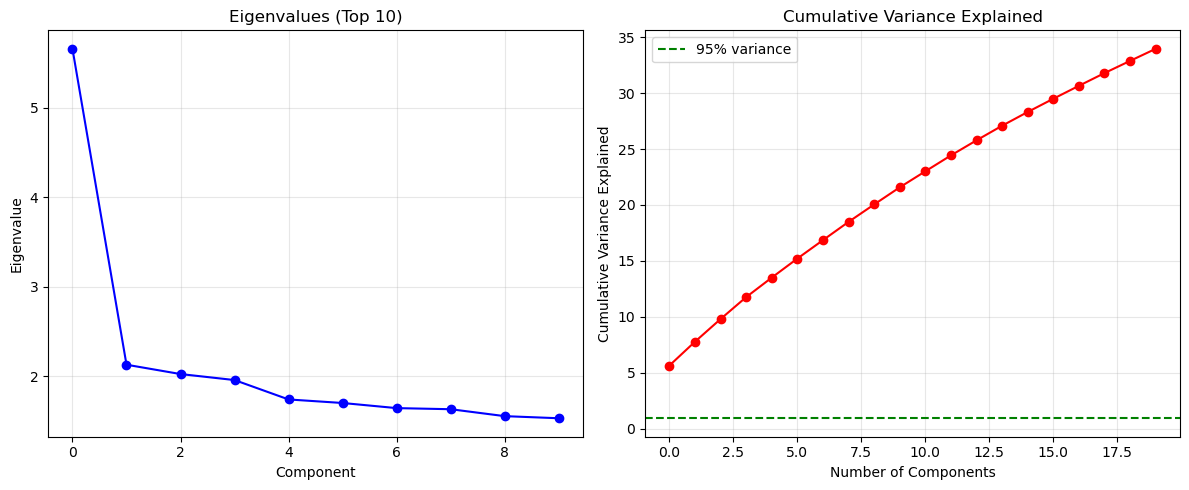


Number of components to explain 95% variance: 1

✅ Eigenvalue analysis applied to ML dimensionality reduction!


In [4]:
print("\n" + "=" * 60)
print("Part 3: Application to ML Problems")
print("=" * 60)

# Example: Using PCA (which uses eigenvalue decomposition internally)
print("\nPCA for Dimensionality Reduction:")
print("-" * 60)

# Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

print(f"\nReduced data shape: {X_pca.shape}")
print(f"Variance explained by 10 components: {pca.explained_variance_ratio_.sum():.4f}")

# Visualize eigenvalues
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(eigenvalues[:10], 'bo-')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues (Top 10)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(cumulative_variance[:20], 'ro-')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Number of components to explain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components to explain 95% variance: {n_components_95}")

print("\n✅ Eigenvalue analysis applied to ML dimensionality reduction!")

## Summary

### Key Concepts:
1. **Eigenvalue Decomposition**: Breaking down matrices into eigenvalues and eigenvectors
2. **Symmetric Matrices**: Have real eigenvalues and orthogonal eigenvectors
3. **Numerical Methods**: Use `eigh()` for symmetric matrices (more efficient than `eig()`)
4. **PCA and Eigenvalues**: Principal Component Analysis uses eigenvalue decomposition
5. **Dimensionality Reduction**: Eigenvalues determine importance of components

### Best Practices:
- Use `scipy.linalg.eigh()` for symmetric matrices (faster, more stable)
- Verify decomposition: Av = λv
- Sort eigenvalues by magnitude for dimensionality reduction
- Use cumulative variance to select number of components

### Applications:
- Principal Component Analysis (PCA)
- Dimensionality reduction
- Data compression
- Feature extraction
- Understanding data structure

**Reference:** Course 03, Unit 1: "Linear Algebra for Machine Learning" - Eigenvalue analysis on large-dimensional matrices practical content